# <p style="text-align: center; color:green">«Ненужные вещи» — ваши ненужные вещи нужны кому-то другому!
---

# Задача:

1. Проанализируйте связь целевого события — просмотра контактов — и других действий пользователей. 
2. Оцените, какие действия чаще совершают те пользователи, которые просматривают контакты.
- Проведите исследовательский анализ данных
- Проанализируйте влияние событий на совершение целевого события
- Проверьте статистические гипотезы
    1. Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.
    2. Сформулируйте собственную статистическую гипотезу. Дополните её нулевой и альтернативной гипотезами. Проверьте гипотезу с помощью статистического теста.  
3. Ответить на вопросы: 
- Пользователи какой группы склонны часто возвращаться в мобильное приложение (retention rate)?
- Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?
- Как различается время между распространенными событиями пользователей из разных групп?

# **Описание данных:**

Датасет содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений.

В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет **mobile_dataset.csv** содержит колонки:

- `event.time` — время совершения
- `event.name` — название события
- `user.id` — идентификатор пользователя

Датасет **mobile_sources.csv** содержит колонки:
- `userId` — идентификатор пользователя
- `source` — источник, с которого пользователь установил приложение

Расшифровки событий:
- `advert_open` — открытие карточки объявления
- `photos_show` — просмотр фотографий в объявлении
- `tips_show` — пользователь увидел рекомендованные объявления
- `tips_click` — пользователь кликнул по рекомендованному объявлению
- `contacts_show` и `show_contacts` — пользователь нажал на кнопку "посмотреть номер телефона" на карточке объявления
- `contacts_call` — пользователь позвонил по номеру телефона на карточке объявления
- `map` — пользователь открыл карту размещенных объявлений
- `search_1` — `search_7` — разные события, связанные с поиском по сайту
- `favorites_add` — добавление объявления в избранное

По итогам исследования подготовьте презентацию. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно **обязательно** в формате **pdf,** прикрепив ссылку на файл в основном проекте.  


# <p style="text-align: center; color:green">ДЕКОМПОЗИЦИЯ</p> <a id="shag0"></a>

**Этап предобработки данных:**  
  * Загрузка и первичный осмотр; 
  * Проверка на корректность наименований колонок;
  * Работа с пропусками;  
  * Работа с типами данных;  
  * Работа с дубликатами;  
  * Работа с числами/датами;
  
**Анализ событий**  

  * Исследуем активность приложения DAU, WAU, Sticky Factor;
  * Посмотрим медианное и среднее количество действий на пользователя;
  * Изучим активность пользователей;
  * По сессиям сравним различные события в приложении;
  * Делим пользователей на группы и по признакам смотрим коэфициент удержания, время сессии и конверсию в просмотр контактов.

- **Проверить статистические гипотезы.**
    1. *Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.*
   - разделить пользователей на две группы  
   - использовать z-test
    2. *У пользователи совершивших действия "favorites_add" и "search_5", конверсия в просмотры контактов различается.*

# <p style="text-align: center; color:green">СОДЕРЖАНИЕ</p> <a id="soder"></a>

[Декомпозиция](#shag0) 

[Шаг 1. Загрузка данных и импорт бибилиотек, модулей](#shag1)  

[Шаг 2. Предобработка и исследовательский анализ данных](#shag2)  
- [2.1 Изучение датасетов. Пропуски](#shag2.1)  
- [2.2 Замена типов ](#shag2.2)  
- [2.3 Дубликаты](#shag2.3)  
- [2.4 Исследование данных](#shag2.4)  
    
[Шаг 3. Анализ событий](#shag3)  
- [3.1 Общий анализ событий и пользователей](#shag3.1)  
- [3.2 Рассчет среднего времени от первого действия до Целевого](#shag3.2)  
- [3.3 Проанализируйте связь Целевого события — просмотра контактов — и других действий пользователей.](#shag3.3)  
- [3.4 Поведение у людей, которые совершали Целевое действие и кто нет](#shag3.4)  
- [3.5 Анализ/сравнение пары событий: Целевое событие и Совершение звонка](#shag3.5)  
- [3.6 Сегментация пользователей по признакам](#shag3.6)
- [3.7 Ответы на вопросы](#shag3.7)
    
[Шаг 4. Проверка статистических гипотез](#shag4)  
- [4.1 Различается ли конверсия в просмотры контактов из источников google и yandex](#shag4.1)  
- [4.2 Своя гипотеза](#shag4.2)   
    
[Выводы и рекомендации](#shag5)    

---

## Импорт библиотек и загрузка данных <a id="shag1"></a>  
[К содержанию](#soder)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import datetime as dt
import plotly.express as px
from scipy import stats as st
import math as mth
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
#Загружаем датасеты

sources = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
df = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')

In [3]:
#Визуально осматриваем датасет с источниками
sources

,userId,source
0,020292ab-89bc-4156-9acf-68bc2783f894,other
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,yandex
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,other
4,f32e1e2a-3027-4693-b793-b7b3ff274439,google
...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,yandex
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,yandex
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,yandex
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,yandex


Сразу заменим названия столбцов на приемлемые

In [4]:
sources.columns = ['user', 'source']
sources.columns

Index(['user', 'source'], dtype='object')

In [5]:
#Теперь смотрим основной датасет
df

,event.time,event.name,user.id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c
...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9


In [6]:
df.columns = ['time', 'event', 'user']

Теперь можно приступить к предобработке

## Предобработка и исследовательский анализ данных <a id="shag2"></a>  
[К содержанию](#soder)

### Изучение датасетов. Пропуски<a id="shag2.1"></a>  
[К содержанию](#soder)

In [7]:
sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    74197 non-null  object
 1   event   74197 non-null  object
 2   user    74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


Пропуски отсутствуют. Необходимо изменить тип колонки `time` датасета `df`, - тип надо поменять на "datetime". Индексы идут по порядку.

### Замена типов<a id="shag2.2"></a>  
[К содержанию](#soder)

В колонке `time` неправильный тип данных. Необходимо это исправить.

In [9]:
df['time'] = df['time'].astype('datetime64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    74197 non-null  datetime64[ns]
 1   event   74197 non-null  object        
 2   user    74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


In [10]:
df.sample(5)

,time,event,user
1779,2019-10-07 20:11:19.203296,search_5,25d83ec9-ab85-4557-b1da-98f8d2d5c312
9674,2019-10-11 11:10:17.386802,tips_show,9d4e157c-8858-478c-82e3-c407b2e3f65c
41010,2019-10-23 14:13:25.798856,tips_show,0d2f2408-97e7-4787-bcf6-a118b0665f7d
54511,2019-10-27 21:54:26.075059,tips_show,c4e93ed3-9dc3-4d82-b6a7-b748d2b58c20
8814,2019-10-10 18:00:29.811619,tips_show,955bd7b0-8da8-49df-adee-546b59347634


### Дубликаты <a id="shag2.3"></a>  
[К содержанию](#soder)

In [11]:
df.duplicated().sum()

0

In [12]:
sources.duplicated().sum()

0

Явных дубликатов нет.

### Исследование данных <a id="shag2.4"></a>  
[К содержанию](#soder)

Проверим датасет `sources`

In [13]:
sources.sample(3)

,user,source
2785,3ad631f1-42c9-4b4b-9d27-254a77b96ac0,yandex
3502,86c5fa91-5db6-4638-aaea-bdfe1bfed5c9,other
2954,7c25c93b-3f32-4179-ac6d-8adbcff52e6a,yandex


In [14]:
sources['source'].value_counts()

yandex    1934
other     1230
google    1129
Name: source, dtype: int64

С источниками все прекрасно, теперь проверим идентификаторы пользователя на уникальность.

In [15]:
print(f'Всего строк - {len(sources)} \nУникальных идентификаторов - {sources["user"].nunique()}')

Всего строк - 4293 
Уникальных идентификаторов - 4293


**Все отлично, датасет `sources` не требует доработки.**

Приступим к датасету `df`

In [16]:
df.sample(3)

,time,event,user
58442,2019-10-29 10:04:27.077083,tips_show,3ef7aba7-2701-42fc-9c96-c3e3226b8129
24870,2019-10-17 10:46:55.603222,tips_show,2ce6c413-30d2-4d26-8b83-0bd21bc66546
84,2019-10-07 00:30:30.826463,tips_show,f32e1e2a-3027-4693-b793-b7b3ff274439


Проверим столбец `time`

In [17]:
df['time'].describe(datetime_is_numeric=True)

count                            74197
mean     2019-10-21 15:32:09.039316992
min         2019-10-07 00:00:00.431357
25%      2019-10-14 22:04:27.791869952
50%      2019-10-22 00:26:56.715014912
75%      2019-10-28 12:35:53.023877120
max         2019-11-03 23:58:12.532487
Name: time, dtype: object

In [18]:
print('Иссдедуемый период =', (df['time'].max() - df['time'].min()))

Иссдедуемый период = 27 days 23:58:12.101130


В нашем распоряжении порядка 28 дней.

Теперь столбец `event`, проверим какие события есть и в каком количестве

In [19]:
df['event'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event, dtype: int64

`contacts_show` и `show_contacts` очевидно одно и тоже. Обьеденим столбцы.

In [20]:
df.loc[(df.query('event == "show_contacts"').index),'event'] = "contacts_show"
df['event'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4529
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
Name: event, dtype: int64

Привели показ контактов в норму.

Самым повторяющимся событием является `tips_show` (показ рекомендации) и `photos_show` (показ фото), а самыми редкими поиски - `search_7`, `search_2`, `search_6`, `search_3` и `contacts_call`.

Перейдем к столбцу `user`

In [21]:
print('Кол-во уникальных пользователей =',df['user'].nunique())

Кол-во уникальных пользователей = 4293


По количеству пользователей все совпадает.

Теперь проверим совпадают ли идентификаторы в обоих датафреймах, используя `set`.

In [22]:
if set(df['user']) == set(sources['user']):
    print('Идентификаторы в датафреймах совпадают')
else:
    print('Идентификаторы в датафреймах не совпадают')

Идентификаторы в датафреймах совпадают


***Датафреймы приведены к годному виду, приступаем к анализу***

## Анализ событий <a id="shag3"></a>  
[К содержанию](#soder)

### Общий анализ событий и пользователей <a id="shag3.1"></a>  
[К содержанию](#soder)

Наше целевое действие - `contacts_show`, от этого и будем отталкиваться при анализе

Для удобства обьеденим таблицы `df`/`sources` и будем работать с одной, а не с двумя.

In [23]:
df = df.merge(sources, on='user', how='left')
df

,time,event,user,source
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex
...,...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902,google
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google


Данные вроде бы отсортированы по времени, но на всякий случай сделаем сортировку.

In [24]:
df = df.sort_values(by='time').reset_index(drop=True)

Посмотрим количество пользователей и событий

In [25]:
print("Кол-во пользователей =", df['user'].nunique())
print("Кол-во событий =", df['event'].count())

Кол-во пользователей = 4293
Кол-во событий = 74197


Найдем среднее количество действий совершаемых пользователем за день.

In [26]:
df.groupby('user')['event'].count().describe()

count    4293.000000
mean       17.283252
std        29.130677
min         1.000000
25%         5.000000
50%         9.000000
75%        17.000000
max       478.000000
Name: event, dtype: float64

In [27]:
print('Кол-во событий которое совершает один пользователь за день -', round(df.groupby('user')['event'].count().median(), 1))

Кол-во событий которое совершает один пользователь за день - 9.0


Перепроверим каким периодом данных располагаем.

In [28]:
print('Исследуемый период =', (df['time'].max() - df['time'].min()))

Исследуемый период = 27 days 23:58:12.101130


Теперь посмотрим сколько пользователей совершило целевое действие и сколько раз они это делали.

In [29]:
contact_show_users = df.query('event == "contacts_show"').groupby('user')['event'].count().sort_values(ascending=False)
print('Кол-во пользователей с целевым действием =', len(contact_show_users))
contact_show_users

Кол-во пользователей с целевым действием = 981


user
e38cb669-7335-4d56-9de5-c8d5d2f13fd3    137
320cab3c-e823-4dff-8c01-c4253764640a    100
cb36854f-570a-41f4-baa8-36680b396370     86
be1449f6-ca45-4f94-93a7-ea4b079b8f0f     83
9b835c74-8ede-4586-9f59-e5473aa48de2     74
                                       ... 
b00645f6-7575-41a0-bd8d-b401aba74a4b      1
afca73a4-dcbd-4fd3-924a-e1c194addffb      1
af860a65-86a7-4a5f-9c50-d1c5d4cf4148      1
af05e2f6-2b2d-4252-8b88-75e297d26d9d      1
8188f8d3-1db1-4cdd-a6bd-2b9b3d2b3819      1
Name: event, Length: 981, dtype: int64

Посмотрим `describe` на `contacts_show`.

In [30]:
contact_show_users.describe()

count    981.000000
mean       4.616718
std        9.621611
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max      137.000000
Name: event, dtype: float64

Среднее значение колеблется в районе 4-5. Визуализируем для наглядности.

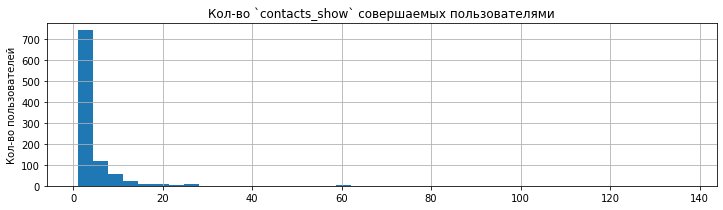

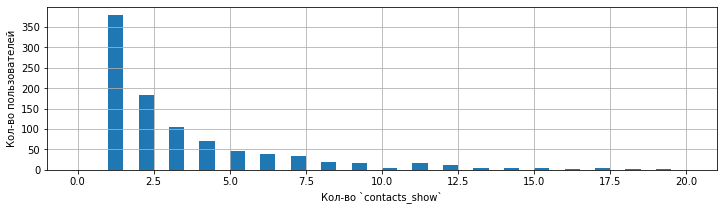

In [31]:
contact_show_users.hist(figsize=(12,3), bins=40)
plt.title('Кол-во `contacts_show` совершаемых пользователями')
plt.ylabel('Кол-во пользователей');
plt.show()
plt.xlabel('Кол-во `contacts_show`')
plt.ylabel('Кол-во пользователей')
contact_show_users.hist(figsize=(12,3), bins=40, range=(0,20));

---

Теперь изучим характер `event` на `user`.

Для начала выделим недели и подкорректируем формат даты.

In [32]:
df['week'] = df['time'].dt.week
# df['day'] = df['time'].dt.day
df['day'] = df['time'].dt.strftime('%Y-%m-%d')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    74197 non-null  datetime64[ns]
 1   event   74197 non-null  object        
 2   user    74197 non-null  object        
 3   source  74197 non-null  object        
 4   week    74197 non-null  int64         
 5   day     74197 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 3.4+ MB


События в подобном датафрейме наглядней всего смотреть на `heatmap`. Для этого сделаем pivot_table с необходимыми данными.

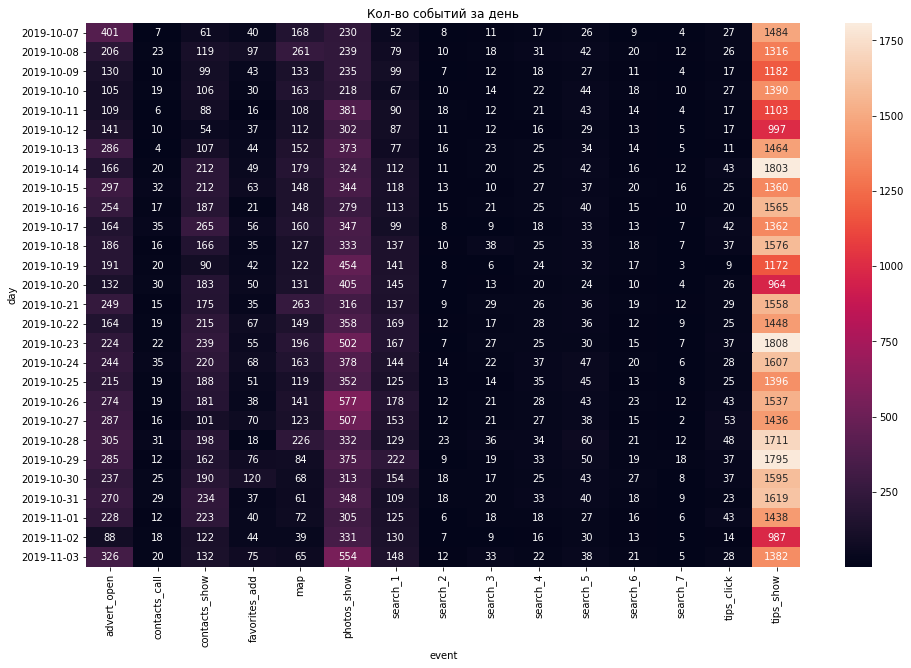

In [34]:
day_event_pivot = df.pivot_table(index='day', columns='event', values='time', aggfunc='count')
plt.figure(figsize=(16,10)) 
plt.title('Кол-во событий за день')
sns.heatmap(day_event_pivot, annot=True, fmt='', square=False);
plt.show()

Также посмотрим на недельные значения.

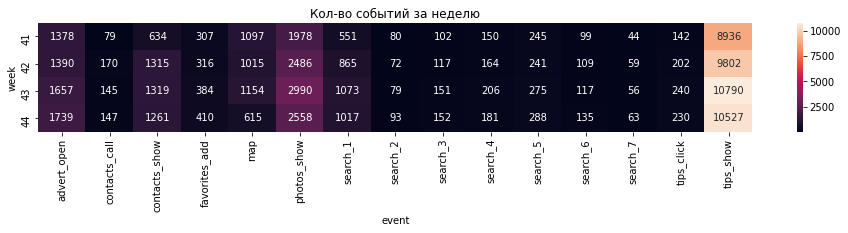

In [35]:
week_event_pivot = df.pivot_table(index='week', columns='event', values='time', aggfunc='count')
plt.figure(figsize=(16,2)) 
plt.title('Кол-во событий за неделю')
sns.heatmap(week_event_pivot, annot=True, fmt='', square=False);

Количество событий распределено довольно равномерно по дням и неделям. 
Показательным будет среднее значение за день. На всякий случай посмотрим и медиану.

In [36]:
mean_events_per_day = df.groupby(['day', 'event'])['time'].count().reset_index()
mean_events_per_day.columns = ['day', 'event', 'n_events']
mean_events_per_day = mean_events_per_day.groupby('event')['n_events'].agg(['median', 'mean']).round(1) #.reset_index()
mean_events_per_day = mean_events_per_day.sort_values(by='mean', ascending=False).reset_index()

print('Медиана и среднее значение событий за день (Весь период) \n')

n_events = df['event'].value_counts().reset_index() # Общее кол-во каждого события
n_events.columns = ['event', 'n_events']

print(mean_events_per_day.merge(n_events, on='event'))

Медиана и среднее значение событий за день (Весь период) 

            event  median    mean  n_events
0       tips_show  1443.0  1430.5     40055
1     photos_show   345.5   357.6     10012
2     advert_open   226.0   220.1      6164
3   contacts_show   178.0   161.8      4529
4             map   137.0   138.6      3881
5        search_1   127.0   125.2      3506
6   favorites_add    44.0    50.6      1417
7        search_5    37.5    37.5      1049
8      tips_click    27.0    29.1       814
9        search_4    25.0    25.0       701
10  contacts_call    19.0    19.3       541
11       search_3    18.0    18.6       522
12       search_6    16.0    16.4       460
13       search_2    11.0    11.6       324
14       search_7     7.0     7.9       222


Среднее значение очень мало отличается от медианы. Пропорционально относительно общего числа событий. Самые частые события - "tips_show" и "photos_show". Самые редкие - search_7, search_2, search_6, search_3

### Рассчет среднего времени от первого действия до `contacts_show`, по сессиям <a id="shag3.2"></a>  
[К содержанию](#soder)

Предварительно посчитаем необходимые сессии и присвоим их общему датасету. Зададим условие, что одна сессия это если у пользователя до следующего события больше чем 30 минут.

In [37]:
session_dev = (df.sort_values(['user', 'time'])
    .groupby('user')['time']
    .diff() > pd.Timedelta('30Min')).cumsum()
    
df['session_id'] = df.groupby(['user', session_dev], sort=False).ngroup() + 1

In [38]:
df['session_id'].unique()

array([    1,     2,     3, ..., 10366, 10367, 10368])

Получилось порядка `10368` сессий.

---

Сделаем таблицу с датами начала исследуемого периода и первого целевого действия.

In [39]:
user_first_contacts_show = df.query('event == "contacts_show"').groupby('session_id')['time'].min().reset_index()
user_first_contacts_show.columns = ['session_id', 'time_first_contacts_show']
user_first_contacts_show

,session_id,time_first_contacts_show
0,3,2019-10-07 00:05:16.003328
1,11,2019-10-07 08:11:07.995945
2,22,2019-10-07 09:33:19.822541
3,34,2019-10-07 10:19:49.080484
4,35,2019-10-07 10:22:52.431529
...,...,...
1698,10353,2019-11-03 23:42:19.043870
1699,10356,2019-11-03 23:09:53.096477
1700,10358,2019-11-03 23:44:12.901643
1701,10362,2019-11-03 23:25:26.942460


In [40]:
user_first_event = df.groupby('session_id')['time'].min().reset_index()
user_last_event = df.groupby('session_id')['time'].max().reset_index()
#user_first_event

Добавим столбец с названием первого события

In [41]:
def event_min(row):
    l = (df.loc[(df['session_id']==row['session_id']) & (df['time']==row['time']),'event']).values #.astype(str)
#     print(l[0])
    return l[0]

def event_max(row):
    l = (df.loc[(df['session_id']==row['session_id']) & (df['time']==row['time']),'event']).values
    
user_first_event['first_event'] = user_first_event.apply(event_min, axis=1)
user_first_event

,session_id,time,first_event
0,1,2019-10-07 00:00:00.431357,advert_open
1,2,2019-10-07 00:00:02.245341,tips_show
2,3,2019-10-07 00:02:07.374346,tips_show
3,4,2019-10-07 00:05:20.190956,search_4
4,5,2019-10-07 00:09:33.715659,tips_show
...,...,...,...
10363,10364,2019-11-03 23:46:10.196861,photos_show
10364,10365,2019-11-03 23:46:31.298524,contacts_show
10365,10366,2019-11-03 23:46:47.068179,map
10366,10367,2019-11-03 23:47:35.841615,photos_show


Присвоили каждой сессии первое событие с которго она начиналась, теперь посмотрим сколько времени понадобилось пользователям чтобы они дошли до целевого действия.

In [42]:
target = user_first_contacts_show.merge(user_first_event, on='session_id', how='left')
target.columns = ['session_id', 'time_first_contacts_show', 'time_first_event', 'first_event']
target['delta_time'] = target['time_first_contacts_show'] - target['time_first_event']
target

,session_id,time_first_contacts_show,time_first_event,first_event,delta_time
0,3,2019-10-07 00:05:16.003328,2019-10-07 00:02:07.374346,tips_show,0 days 00:03:08.628982
1,11,2019-10-07 08:11:07.995945,2019-10-07 08:02:57.953535,photos_show,0 days 00:08:10.042410
2,22,2019-10-07 09:33:19.822541,2019-10-07 09:33:19.822541,contacts_show,0 days 00:00:00
3,34,2019-10-07 10:19:49.080484,2019-10-07 10:18:55.701270,tips_show,0 days 00:00:53.379214
4,35,2019-10-07 10:22:52.431529,2019-10-07 10:22:52.431529,contacts_show,0 days 00:00:00
...,...,...,...,...,...
1698,10353,2019-11-03 23:42:19.043870,2019-11-03 22:56:25.671231,tips_show,0 days 00:45:53.372639
1699,10356,2019-11-03 23:09:53.096477,2019-11-03 22:56:52.422101,tips_show,0 days 00:13:00.674376
1700,10358,2019-11-03 23:44:12.901643,2019-11-03 23:07:12.690754,tips_show,0 days 00:37:00.210889
1701,10362,2019-11-03 23:25:26.942460,2019-11-03 23:25:26.942460,contacts_show,0 days 00:00:00


In [43]:
target.sort_values(by='delta_time')

,session_id,time_first_contacts_show,time_first_event,first_event,delta_time
1702,10365,2019-11-03 23:46:31.298524,2019-11-03 23:46:31.298524,contacts_show,0 days 00:00:00
452,3136,2019-10-17 10:27:43.349126,2019-10-17 10:27:43.349126,contacts_show,0 days 00:00:00
453,3142,2019-10-17 10:47:31.832891,2019-10-17 10:47:31.832891,contacts_show,0 days 00:00:00
454,3143,2019-10-17 10:49:27.254836,2019-10-17 10:49:27.254836,contacts_show,0 days 00:00:00
455,3149,2019-10-17 10:55:29.451671,2019-10-17 10:55:29.451671,contacts_show,0 days 00:00:00
...,...,...,...,...,...
909,5687,2019-10-23 17:33:49.896427,2019-10-23 16:19:02.332766,map,0 days 01:14:47.563661
1500,9320,2019-11-01 09:52:12.464813,2019-11-01 08:35:49.032454,tips_show,0 days 01:16:23.432359
822,5186,2019-10-22 16:25:11.250876,2019-10-22 14:57:01.326984,tips_show,0 days 01:28:09.923892
791,5066,2019-10-22 12:23:51.738699,2019-10-22 10:45:46.187035,search_1,0 days 01:38:05.551664


**Корректировка:** В итоге получилось порядка 10353 сессий из которых только 1703 дошли до просмотра контактов. Итого общая конверсия по сессиям получается порядка 16%.

---

Проверим связь "contacts_show" там где "delta_time" = "0 days 00:00:00"

In [44]:
target.query('delta_time =="0 days 00:00:00"')['first_event'].value_counts()

contacts_show    543
Name: first_event, dtype: int64

Из этого следует, что есть пласт пользователей, у которых `contacts_show` был первым событием. Вероятно событие не попало в срез данных. Но т.к. нас интересует именно `конверсия в целевое действие`, то можем смело отбросить пользователей не прошедших по данной "воронке".

In [45]:
target = target.query('delta_time !="0 days 00:00:00"').reset_index(drop=True)
target

,session_id,time_first_contacts_show,time_first_event,first_event,delta_time
0,3,2019-10-07 00:05:16.003328,2019-10-07 00:02:07.374346,tips_show,0 days 00:03:08.628982
1,11,2019-10-07 08:11:07.995945,2019-10-07 08:02:57.953535,photos_show,0 days 00:08:10.042410
2,34,2019-10-07 10:19:49.080484,2019-10-07 10:18:55.701270,tips_show,0 days 00:00:53.379214
3,36,2019-10-07 11:28:52.489988,2019-10-07 10:43:44.928171,search_4,0 days 00:45:07.561817
4,39,2019-10-07 11:11:50.979295,2019-10-07 11:05:14.218431,advert_open,0 days 00:06:36.760864
...,...,...,...,...,...
1155,10341,2019-11-03 22:38:17.561256,2019-11-03 22:29:55.367576,search_1,0 days 00:08:22.193680
1156,10351,2019-11-03 22:55:22.472005,2019-11-03 22:53:41.398799,search_5,0 days 00:01:41.073206
1157,10353,2019-11-03 23:42:19.043870,2019-11-03 22:56:25.671231,tips_show,0 days 00:45:53.372639
1158,10356,2019-11-03 23:09:53.096477,2019-11-03 22:56:52.422101,tips_show,0 days 00:13:00.674376


In [46]:
target['session_id'].count()

1160

Получили 1160 строк `session_id`.

Теперь выясним среднее время и медиану.

In [47]:
print(f"Среднее время = {target['delta_time'].mean()} \nМедианное время = {target['delta_time'].median()}")

Среднее время = 0 days 00:09:45.569282692 
Медианное время = 0 days 00:04:51.950202500


In [48]:
target['delta_time'].describe()

count                         1160
mean     0 days 00:09:45.569282692
std      0 days 00:13:38.461736017
min         0 days 00:00:00.158918
25%      0 days 00:01:23.731704750
50%      0 days 00:04:51.950202500
75%      0 days 00:12:20.300075250
max         0 days 03:21:08.091077
Name: delta_time, dtype: object

Разница между средним и медианой порядка 5 минут. Построим график для визуализации данных. Но для начала переведем время в минуты.

In [49]:
delta_minutes = round(target['delta_time'].dt.total_seconds()/60, 1)
delta_minutes

0        3.1
1        8.2
2        0.9
3       45.1
4        6.6
        ... 
1155     8.4
1156     1.7
1157    45.9
1158    13.0
1159    37.0
Name: delta_time, Length: 1160, dtype: float64

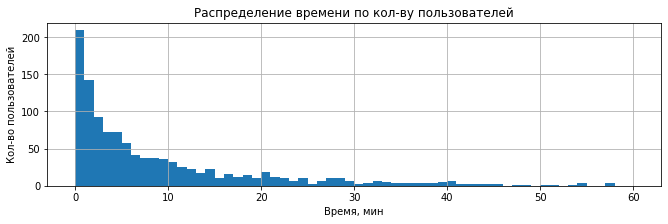

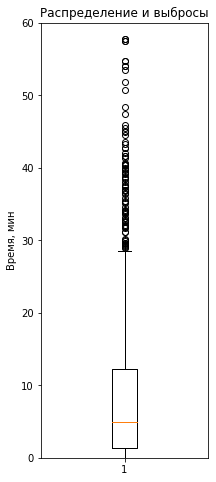

In [50]:
delta_minutes.hist(figsize=(11,3),bins=60, range=(0,60));
plt.title('Распределение времени по кол-ву пользователей')
plt.ylabel('Кол-во пользователей')
plt.xlabel('Время, мин');
plt.show()
plt.figure(figsize=(3,8))
plt.title('Распределение и выбросы')
plt.ylabel('Время, мин');
plt.boxplot(delta_minutes)
plt.ylim(0,60);

Медиана далеко от выбросов. Попробуем глянуть через перцентиль.

In [51]:
for perc in range(5,100,5):
    print(f"{perc}-й перцентиль = {round(np.percentile(delta_minutes, perc),1)} минут")

5-й перцентиль = 0.3 минут
10-й перцентиль = 0.5 минут
15-й перцентиль = 0.8 минут
20-й перцентиль = 1.1 минут
25-й перцентиль = 1.4 минут
30-й перцентиль = 1.9 минут
35-й перцентиль = 2.6 минут
40-й перцентиль = 3.2 минут
45-й перцентиль = 4.0 минут
50-й перцентиль = 4.9 минут
55-й перцентиль = 5.8 минут
60-й перцентиль = 7.1 минут
65-й перцентиль = 8.7 минут
70-й перцентиль = 10.3 минут
75-й перцентиль = 12.3 минут
80-й перцентиль = 15.7 минут
85-й перцентиль = 20.1 минут
90-й перцентиль = 26.3 минут
95-й перцентиль = 36.4 минут


**Вывод:** В среднем распределение довольно плавное, после 80 перцинтиля идет маленький скачок.

Теперь посмотрим сколько времени пользователи проводят в приложении. Началом и концом сессии будем считать первое и последнее событие. Исключим события где время равно нулю.

In [52]:
first_time = df.groupby('session_id').agg({'time':'min'})
last_time = df.groupby('session_id').agg({'time':'max'})
all_time = first_time.merge(last_time, on='session_id', how='outer').reset_index()
all_time.columns = ['session_id', 'first_time', 'last_time']
all_time

,session_id,first_time,last_time
0,1,2019-10-07 00:00:00.431357,2019-10-07 00:18:42.917148
1,2,2019-10-07 00:00:02.245341,2019-10-07 00:41:40.115094
2,3,2019-10-07 00:02:07.374346,2019-10-07 00:30:22.373280
3,4,2019-10-07 00:05:20.190956,2019-10-07 00:05:23.427766
4,5,2019-10-07 00:09:33.715659,2019-10-07 00:50:22.211720
...,...,...,...
10363,10364,2019-11-03 23:46:10.196861,2019-11-03 23:46:10.196861
10364,10365,2019-11-03 23:46:31.298524,2019-11-03 23:52:01.835490
10365,10366,2019-11-03 23:46:47.068179,2019-11-03 23:47:50.087645
10366,10367,2019-11-03 23:47:35.841615,2019-11-03 23:47:35.841615


Теперь ищем дельту

In [53]:
all_time['delta'] = all_time['last_time'] - all_time['first_time']
all_time

,session_id,first_time,last_time,delta
0,1,2019-10-07 00:00:00.431357,2019-10-07 00:18:42.917148,0 days 00:18:42.485791
1,2,2019-10-07 00:00:02.245341,2019-10-07 00:41:40.115094,0 days 00:41:37.869753
2,3,2019-10-07 00:02:07.374346,2019-10-07 00:30:22.373280,0 days 00:28:14.998934
3,4,2019-10-07 00:05:20.190956,2019-10-07 00:05:23.427766,0 days 00:00:03.236810
4,5,2019-10-07 00:09:33.715659,2019-10-07 00:50:22.211720,0 days 00:40:48.496061
...,...,...,...,...
10363,10364,2019-11-03 23:46:10.196861,2019-11-03 23:46:10.196861,0 days 00:00:00
10364,10365,2019-11-03 23:46:31.298524,2019-11-03 23:52:01.835490,0 days 00:05:30.536966
10365,10366,2019-11-03 23:46:47.068179,2019-11-03 23:47:50.087645,0 days 00:01:03.019466
10366,10367,2019-11-03 23:47:35.841615,2019-11-03 23:47:35.841615,0 days 00:00:00


Посмотрим количество пользователей с дельтой равной `0`.

In [54]:
all_time_zero = all_time[all_time['delta']=='0 days 00:00:00']
all_time_zero.count()

session_id    2088
first_time    2088
last_time     2088
delta         2088
dtype: int64

2088 сессий равно нулю. т.к. данные пользователи неактивны и не несут никакой практической ценности, надо от них избавиться.

In [55]:
all_time = all_time.drop(all_time[all_time['delta']=='0 days 00:00:00'].index).reset_index()

In [56]:
all_time['delta'].describe()

count                         8280
mean     0 days 00:16:07.520506915
std      0 days 00:21:00.757685144
min         0 days 00:00:00.000181
25%         0 days 00:03:04.825509
50%      0 days 00:09:12.046461500
75%      0 days 00:21:28.456179500
max         0 days 05:21:58.296302
Name: delta, dtype: object

<AxesSubplot:xlabel='delta', ylabel='Density'>

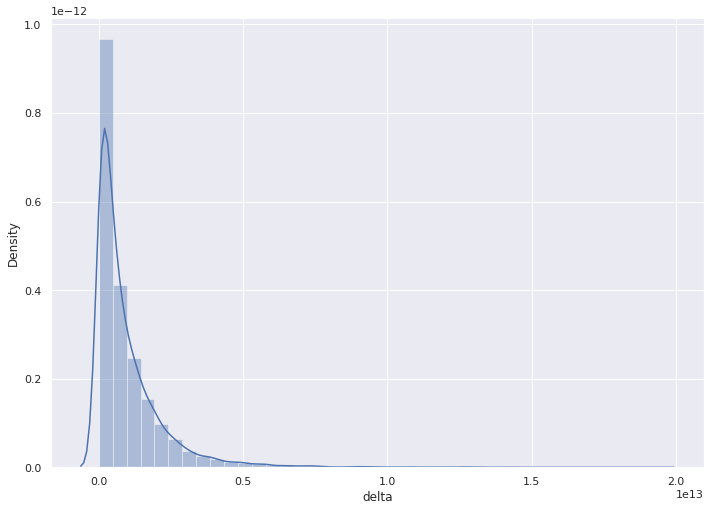

In [57]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(all_time['delta'], bins= 40)

**Вывод:** Построил график наглядного распределения времени проведенного в приложении. Видно что наибольшее количество сессий ограничивается в диапазоне до ~30 минут. И большая часть сессий довольно короткая.

### Подсчитаем чистую конверсию сессий в целевое


In [58]:
target_session_count = target['session_id'].count()
target_session_count

1160

Всего 1703 сессии в которых было совершено целевое действие. Теперь поделим на общее количество сессий (без учета нулевых).

In [59]:
all_time_session_count = all_time['index'].count()
all_time_session_count

8280

In [60]:
target_session_conversion = target_session_count / all_time_session_count

In [61]:
target_session_conversion

0.14009661835748793

**ВЫВОД:**

В разрезе сессий мы получили конверсию порядка 14%, что очень хороший результат. Напомним что целевое событие - просмотр контактов. Порядка 1/5 человек просматривает контакты.

### Поведение людей, кто совершали ЦС и кто нет <a id="shag3.4"></a>  
[К содержанию](#soder)  

Сравним, есть ли разница в поведении у людей, которые совершали целевое событие и кто нет.

**Проверим есть ли такие пользователи которые совершили звонок (contacts_call) без "contacts_show". Такого быть не должно.**

In [62]:
con_show_users = df.query('event=="contacts_show"')['user'].unique().tolist()
print("Кол-во пользователей совершавших ЦС =", len(con_show_users))

all_users = df['user'].unique()
print("Кол-во всех пользователей =", len(all_users))

no_con_show_users = list( set(all_users) - set(con_show_users) )
print("Кол-во пользователей не совершавших ЦС =", len(no_con_show_users))


Кол-во пользователей совершавших ЦС = 981
Кол-во всех пользователей = 4293
Кол-во пользователей не совершавших ЦС = 3312


**Теперь проверим есть ли среди пользователей, кто проскочил сразу на `contacts_call`**

In [63]:
df.query('user==@no_con_show_users and event=="contacts_call"')

,time,event,user,source,week,day,session_id


**Все в порядке таких таких пользователей нет.**

**Создадим 2 таблицы - пользователи и их действия, одна для целевых, другая для остальных. И сравним кол-во действий которые они совершали визуально, на пироге.**

In [64]:
no_con_show = df.query('user==@no_con_show_users')['event'].value_counts()
no_con_show

tips_show        27287
photos_show       6184
advert_open       4575
map               2780
search_1          2165
favorites_add      993
search_5           800
search_4           552
tips_click         481
search_6           386
search_3           378
search_2           228
search_7           191
Name: event, dtype: int64

**Сделаем тоже для тех, кто совершал целевое действие. Сами действия и звонки уберем.**

In [65]:
con_show = df.query('user==@con_show_users')['event'].value_counts()
con_show = con_show.drop(['contacts_call','contacts_show'])
con_show

tips_show        12768
photos_show       3828
advert_open       1589
search_1          1341
map               1101
favorites_add      424
tips_click         333
search_5           249
search_4           149
search_3           144
search_2            96
search_6            74
search_7            31
Name: event, dtype: int64

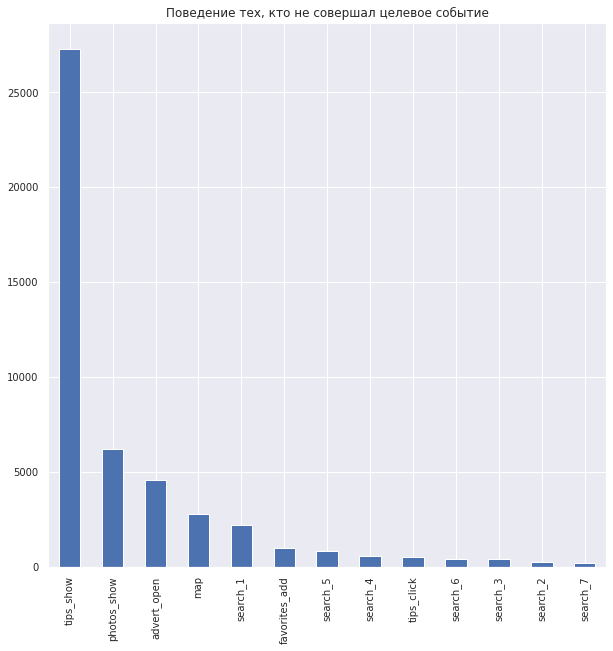

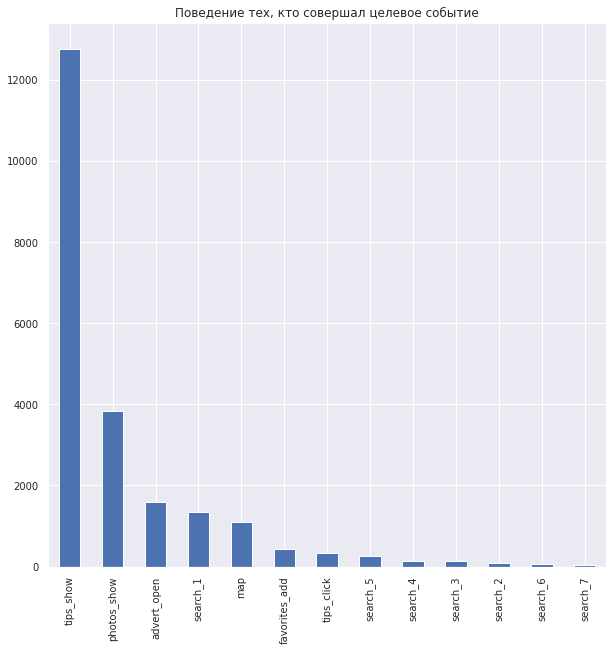

In [66]:
plt.figure(figsize=(10,10))

no_con_show.plot(kind="bar", fontsize=10);
plt.title('Поведение тех, кто не совершал целевое событие');
plt.show();

plt.figure(figsize=(10,10))
con_show.plot(kind="bar", fontsize=10);
plt.title('Поведение тех, кто совершал целевое событие');

***Вывод: Среди 2 групп - кто совершал ЦС и кто нет, есть некоторые отличия в долях по группам:***  

**Совершившие целевое событие `contacts_show`:**  
* больше любят `photos_show` - 17,3% против 13,2% во второй группе  
* но меньше любят `advert_open` - 7,2% против 9,7% во второй  
* больше любят `search_1` - 6,1% против 4.6% во второй  
* но меньше любят `map` - 5% против 5,9% во второй  

(в остальных событиях отличия мало существенны)

### Анализ/сравнение пары событий: целевое и совершение звонка  <a id="shag3.5"></a>  
[К содержанию](#soder) 

In [67]:
print('Всего пользователей - 4293')
print("Кол-во пользователей, Посмотрели контакт (ЦС) -", len(con_show_users))
print(f'Доля пользователей совершивших ЦС - {(981/4293):.2%} ')

Всего пользователей - 4293
Кол-во пользователей, Посмотрели контакт (ЦС) - 981
Доля пользователей совершивших ЦС - 22.85% 


**Посмотрим тех пользователей, кто в итоге не позвонил, создадим отдельный список - `no_call_users`, а в `call_users` добавим тех кто звонил)**

In [68]:
call_users = df.query('event =="contacts_call"')['user'].unique().tolist()
print("Кол-во пользователей, которые звонили -", len(call_users))
print(f'Доля звонивших в совершивших ЦС - {(213/981):.2%} ')
print(f'Доля во всех пльзователях - {(213/4293):.2%} ')
print()
no_call_users = list(set(con_show_users) - set(call_users))
print("Кол-во пользователей, кто совершил ЦС (посмотрели контакт), но не звонили -", len(no_call_users))
print(f'Доля не звонивших после ЦС - {(768/981):.2%} ')
print(f'Доля во всех пользователях - {(768/4293):.2%} ')

Кол-во пользователей, которые звонили - 213
Доля звонивших в совершивших ЦС - 21.71% 
Доля во всех пльзователях - 4.96% 

Кол-во пользователей, кто совершил ЦС (посмотрели контакт), но не звонили - 768
Доля не звонивших после ЦС - 78.29% 
Доля во всех пользователях - 17.89% 


**Теперь изучим какие действия делают эти две группы пользователей**

In [69]:
calling = df.query('user==@call_users')['event'].value_counts()
calling

photos_show      1626
contacts_show     967
search_1          674
contacts_call     541
favorites_add     143
advert_open       121
tips_show           1
Name: event, dtype: int64

In [70]:
not_calling = df.query('user==@no_call_users')['event'].value_counts()
not_calling

tips_show        12767
contacts_show     3562
photos_show       2202
advert_open       1468
map               1101
search_1           667
tips_click         333
favorites_add      281
search_5           249
search_4           149
search_3           144
search_2            96
search_6            74
search_7            31
Name: event, dtype: int64

In [71]:
contact_show = not_calling.reset_index().merge(calling.reset_index(), on='index', how='left')
contact_show.columns = ['event', 'not_calling', 'calling']
contact_show = contact_show.fillna(0)
print('Количество событий теми кто звонил и теми кто совершил ЦС')
print()
print(contact_show)

Количество событий теми кто звонил и теми кто совершил ЦС

            event  not_calling  calling
0       tips_show        12767      1.0
1   contacts_show         3562    967.0
2     photos_show         2202   1626.0
3     advert_open         1468    121.0
4             map         1101      0.0
5        search_1          667    674.0
6      tips_click          333      0.0
7   favorites_add          281    143.0
8        search_5          249      0.0
9        search_4          149      0.0
10       search_3          144      0.0
11       search_2           96      0.0
12       search_6           74      0.0
13       search_7           31      0.0


***Вывод: Доля совершивших целевое событие - 78.29%, а тех кто после этого события позвонил всего лишь - 21.71%. Отсюда можно выделить различия между группами:***  

**Звонящие:**
* В основном приходят из `photos_show` и `search_1`, и иногда `favorites_add`. 
* Они практически не проходят через `advert_open`.
* Остальные действия не совершают.  

### Сегментация пользователей по признакам  <a id="shag3.6"></a>  
[К содержанию](#soder) 

Для дальнейшего ответа на вопросы необходимо подготовить DF, создать профили для сегментации пользователей по признакам, через K-Means. Для этого нам пригодится больше числовых признаков.
Построим матрицу корреляции, чтобы наглядно понимать зависимость событий.
Испозуем функцию get_dummies, для преобразования категориальных переменных. И построим матрицу корреляции этих самых событий.

In [72]:
df

,time,event,user,source,week,day,session_id
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,41,2019-10-07,1
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,41,2019-10-07,1
2,2019-10-07 00:00:02.245341,tips_show,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,41,2019-10-07,2
3,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,41,2019-10-07,1
4,2019-10-07 00:00:56.319813,advert_open,cf7eda61-9349-469f-ac27-e5b6f5ec475c,yandex,41,2019-10-07,2
...,...,...,...,...,...,...,...
74192,2019-11-03 23:53:29.534986,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,44,2019-11-03,10353
74193,2019-11-03 23:54:00.407086,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,44,2019-11-03,10353
74194,2019-11-03 23:56:57.041825,search_1,20850c8f-4135-4059-b13b-198d3ac59902,google,44,2019-11-03,10368
74195,2019-11-03 23:57:06.232189,tips_show,28fccdf4-7b9e-42f5-bc73-439a265f20e9,google,44,2019-11-03,10353


Дадим источникам свои цифры, Яндекс - 1, Гугл - 2, Другое - 3.
Недели 1,2,3,4
Ивенты каждый под своим номером

Сразу сделаем это в рамках профиля.

In [73]:
profiles_source = df.set_index('user')['source'].str.get_dummies().max(level=0).reset_index()
profiles_source.head()

,user,google,other,yandex
0,020292ab-89bc-4156-9acf-68bc2783f894,0,1,0
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,0,0,1
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,0,0,1
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,0,1,0
4,f32e1e2a-3027-4693-b793-b7b3ff274439,1,0,0


In [74]:
profiles = df.merge(profiles_source, on='user', how='left')

In [75]:
profiles.head(1)

,time,event,user,source,week,day,session_id,google,other,yandex
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,41,2019-10-07,1,0,1,0


In [76]:
profiles['user'].nunique()

4293

Обьеденим основную таблицу и таблицу с источниками.

In [77]:
profiles_clusters_clear_v2 = df.set_index('user')['event'].str.get_dummies().max(level=0).reset_index()

In [78]:
profiles_clusters_clear_v2.head(1)

,user,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search_1,search_2,search_3,search_4,search_5,search_6,search_7,tips_click,tips_show
0,020292ab-89bc-4156-9acf-68bc2783f894,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [79]:
profiles_clusters_clear_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user           4293 non-null   object
 1   advert_open    4293 non-null   int64 
 2   contacts_call  4293 non-null   int64 
 3   contacts_show  4293 non-null   int64 
 4   favorites_add  4293 non-null   int64 
 5   map            4293 non-null   int64 
 6   photos_show    4293 non-null   int64 
 7   search_1       4293 non-null   int64 
 8   search_2       4293 non-null   int64 
 9   search_3       4293 non-null   int64 
 10  search_4       4293 non-null   int64 
 11  search_5       4293 non-null   int64 
 12  search_6       4293 non-null   int64 
 13  search_7       4293 non-null   int64 
 14  tips_click     4293 non-null   int64 
 15  tips_show      4293 non-null   int64 
dtypes: int64(15), object(1)
memory usage: 536.8+ KB


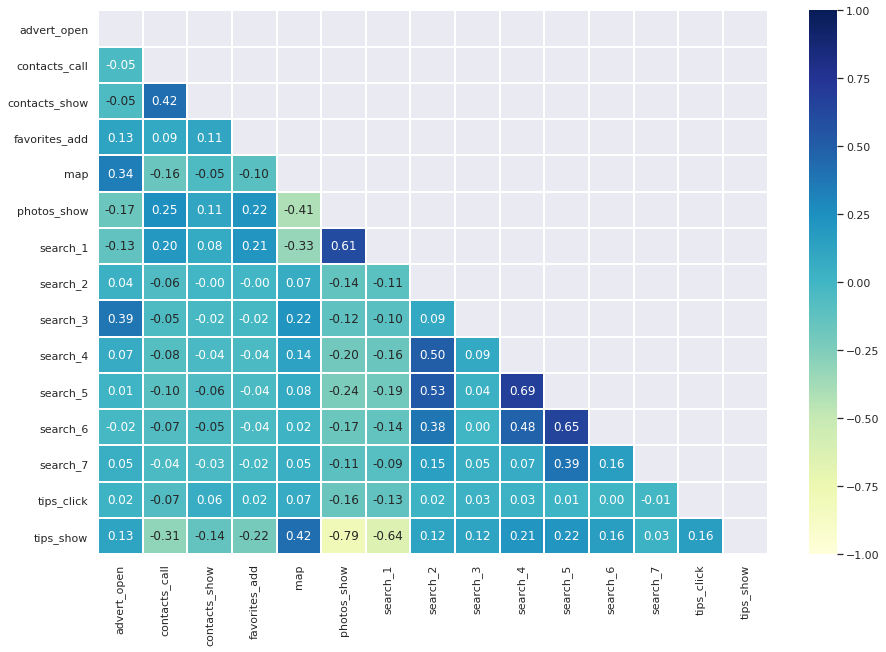

In [80]:
matrix = np.triu(profiles_clusters_clear_v2.corr())
plt.figure(figsize=(15, 10))
sns.heatmap(profiles_clusters_clear_v2.corr(), annot=True, mask=matrix, fmt = '0.2f', linewidths=1, vmin=-1, vmax=1, center= 0, cmap="YlGnBu")
plt.show()

Матрица корреляции показывает сильную зависимость между некоторыми видами поиска, напимер `search_5` и `search_4`. Также можно отметить что пользователи пользующиеся `photos_show` вероятнее всего пришли к нам из `search_1`. Ну и из очевидного, пользователи `contacts_call` зависят от `constacts_show`.
\
\
Реклама имеет завязку на `search_3` и `map`. Вероятнее всего имено в этих двух категориях реклама наиболее распространена.

Смотрим дендограмму чтобы выбрать количество кластеров на которые мы будем делить наши профили.

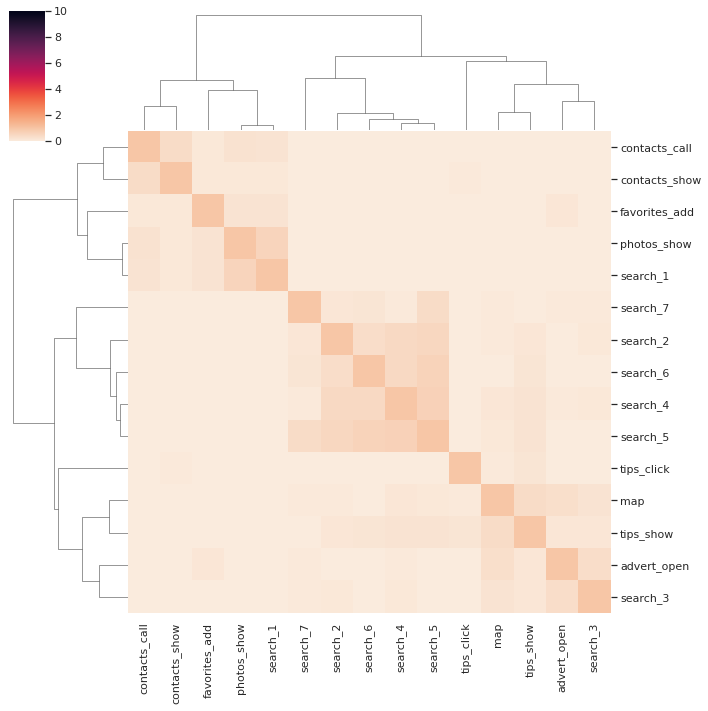

In [81]:
sns.clustermap(profiles_clusters_clear_v2.corr(), cmap="rocket_r", vmin=0, vmax=10,metric="correlation")

Дендограмма показывает, что корректнее всего будет поделить пользователей на три группы. Один кластер пользователей будет побольше и два поменьше.

In [82]:
#profiles_clusters_clear_v2

In [83]:
#scaler не хочет кушать мой столбец с user, поэтому дропну его для распределения кластеров.
profiles_clusters_clear_v3 = profiles_clusters_clear_v2.drop('user', axis=1)

In [84]:
scaler = StandardScaler()
X_st = scaler.fit_transform(profiles_clusters_clear_v3)

Передаем в KMeans число кластеров и датафрейм.

In [85]:
km = KMeans(n_clusters = 3, random_state = 0)
labels = km.fit_predict(X_st)

df_clust = profiles_clusters_clear_v2.copy(deep=True)
df_clust['cluster'] = labels

In [86]:
df_clust['cluster'].value_counts()

0    2382
1    1267
2     644
Name: cluster, dtype: int64

Получили датафрейм с кластерами.

In [87]:
df_clust

,user,advert_open,contacts_call,contacts_show,favorites_add,map,photos_show,search_1,search_2,search_3,search_4,search_5,search_6,search_7,tips_click,tips_show,cluster
0,020292ab-89bc-4156-9acf-68bc2783f894,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,cf7eda61-9349-469f-ac27-e5b6f5ec475c,1,0,0,0,1,0,0,1,0,1,1,0,0,1,1,2
2,8c356c42-3ba9-4cb6-80b8-3f868d0192c3,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0
3,d9b06b47-0f36-419b-bbb0-3533e582a6cb,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,2
4,f32e1e2a-3027-4693-b793-b7b3ff274439,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,b86fe56e-f2de-4f8a-b192-cd89a37ecd41,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4289,424c0ae1-3ea3-4f1e-a814-6bac73e48ab1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4290,437a4cd4-9ba9-457f-8614-d142bc48fbeb,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4291,c10055f0-0b47-477a-869e-d391b31fdf8f,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


Так, поделили на кластеры, теперь мержим с основными датафреймами.

In [88]:
data = pd.merge(df,df_clust[['user','cluster']],on='user', how='right')
data = pd.merge(data, all_time, on='session_id', how='right')

In [89]:
data.head()

,time,event,user,source,week,day,session_id,cluster,index,first_time,last_time,delta
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,41,2019-10-07,1,0,0,2019-10-07 00:00:00.431357,2019-10-07 00:18:42.917148,0 days 00:18:42.485791
1,2019-10-07 00:00:01.236320,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,41,2019-10-07,1,0,0,2019-10-07 00:00:00.431357,2019-10-07 00:18:42.917148,0 days 00:18:42.485791
2,2019-10-07 00:00:07.039334,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,41,2019-10-07,1,0,0,2019-10-07 00:00:00.431357,2019-10-07 00:18:42.917148,0 days 00:18:42.485791
3,2019-10-07 00:01:27.770232,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,41,2019-10-07,1,0,0,2019-10-07 00:00:00.431357,2019-10-07 00:18:42.917148,0 days 00:18:42.485791
4,2019-10-07 00:01:34.804591,tips_show,020292ab-89bc-4156-9acf-68bc2783f894,other,41,2019-10-07,1,0,0,2019-10-07 00:00:00.431357,2019-10-07 00:18:42.917148,0 days 00:18:42.485791


***Вывод:*** На выходе мы получили готовый датафрейм со временами, источниками, айди сессии и другими признаками. Теперь можно приступить к ответам на вопросы и финальному анализу.

### Ответы на вопросы
[К содержанию](#soder) 

* Пользователи какой группы склонны часто возвращаться в мобильное приложение (retention rate)?

In [90]:
def get_retention(data, by_1, by_2, dimensions=[]):
    
    ''' 
    Функция считает коэф. удержания по заданному dimensions
    '''

    dimensions = dimensions
    
    data_rr = data.copy(deep=True)
    
    data_1 = by_1
    data_2 = by_2
    
    #data_rr['event_time'] - data_rr['first_st']

    data_rr['lifetime'] = (data_1 - data_2).dt.days

    result_grouped = data_rr.pivot_table(
        index=dimensions,  # заменили dt
        columns='lifetime',
        values='user',
        aggfunc='nunique',
    )
    cohort_sizes = (
        data_rr.groupby(dimensions)  # заменили dt
        .agg({'user': 'nunique'})
        .rename(columns={'user': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on=dimensions, how='left'  
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания
    return result_grouped

Теперь посчитаем RR для каждого из выделенных кластеров.

In [91]:
retention_cluster = get_retention(data.query('cluster == 0'), data['first_time'], data['time'], 
                          dimensions=['week'])

In [92]:
retention_cluster_2 = get_retention(data.query('cluster == 1'), data['first_time'], data['time'], 
                          dimensions=['week'])

In [93]:
retention_cluster_3 = get_retention(data.query('cluster == 2'), data['first_time'], data['time'], 
                          dimensions=['week'])

Построим график

<AxesSubplot:xlabel='week'>

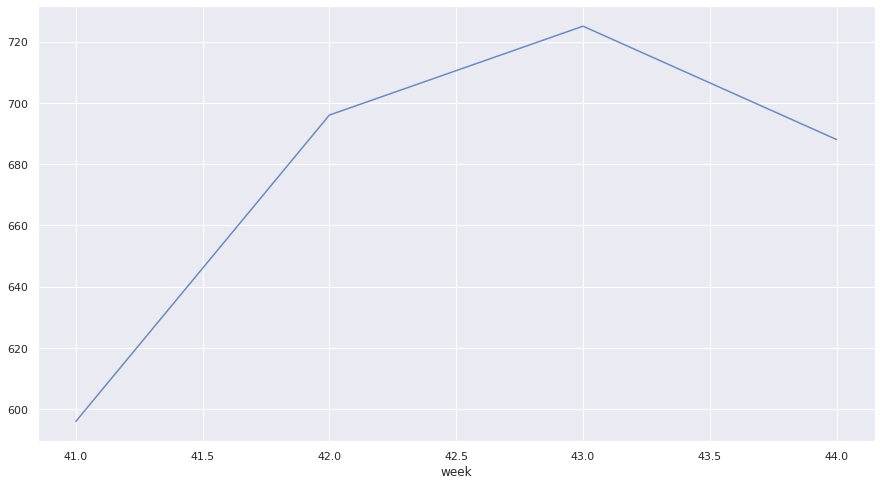

In [94]:
retention_cluster['cohort_size'].T.plot(grid=True, figsize=(15, 8), alpha=0.8)

Если рассматривать удержание в разрезе недели, то результат довольно хороший, но к концу 4ой недели падает.

<AxesSubplot:xlabel='week'>

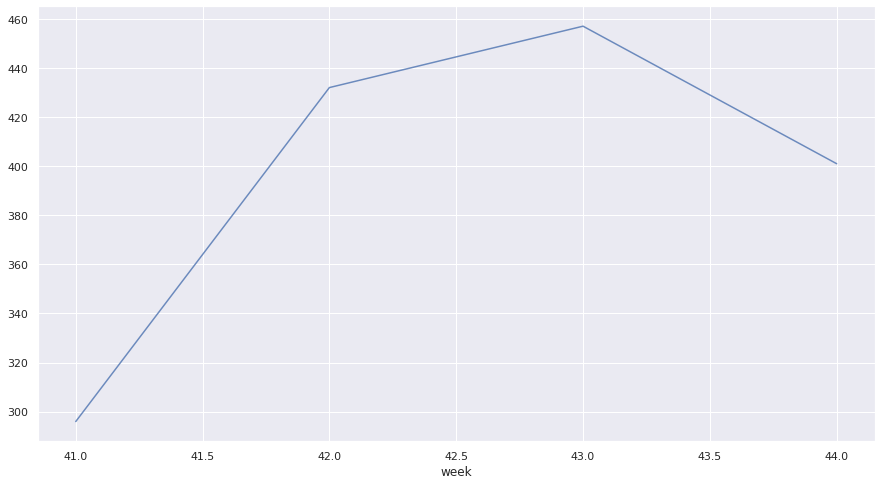

In [95]:
retention_cluster_2['cohort_size'].T.plot(grid=True, figsize=(15, 8), alpha=0.8)

2ая группа более плавно теряет пользователей, но тоже имеет тенденцию к падению.

<AxesSubplot:xlabel='week'>

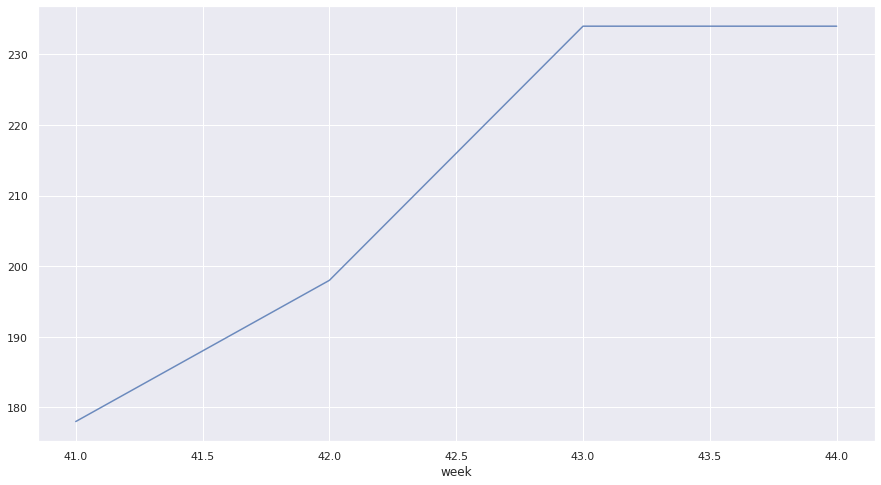

In [96]:
retention_cluster_3['cohort_size'].T.plot(grid=True, figsize=(15, 8), alpha=0.8)

Третья группа безоговорочный лидер, здесь удержание явно работает хорошо и показывает стабильный рост аудитории.

**Вывод:** Удержание по группам показало, что удержание в целом схоже. Но, примерно на 3ей неделе начинается замедление и аудитория начинает падать среди всех трех групп. Мне кажется что специфика приложения может играть в этом роль.

* Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?

Сделаем 3 раздельны дф с группами для удобства подсчета конверсии.

In [97]:
group_1 = data.query('cluster == 0')
group_2 = data.query('cluster == 1')
group_3 = data.query('cluster == 2')

Посмотрим количество целевых событий по группам.

In [98]:
group_1_event = group_1.query('event == "contacts_show"')
group_2_event = group_2.query('event == "contacts_show"')
group_3_event = group_3.query('event == "contacts_show"')

In [99]:
group_1_count_event = group_1_event['user'].nunique()
group_2_count_event = group_2_event['user'].nunique()
group_3_count_event = group_3_event['user'].nunique()

In [100]:
group_1_count = group_1['user'].nunique()
group_2_count = group_2['user'].nunique()
group_3_count = group_3['user'].nunique()

Посчитали количество целевых событий по группам и количество всего событий. Теперь можно рассчитать конверсию для каждой из групп.

In [101]:
group_1_conversion = group_1_count_event / group_1_count * 100
group_2_conversion = group_2_count_event / group_2_count * 100
group_3_conversion = group_3_count_event / group_3_count * 100

In [102]:
group_1_conversion

19.15261565067013

In [103]:
group_2_conversion

31.763766959297683

In [104]:
group_3_conversion

16.61490683229814

**Вывод:** Среди трех групп, есть однозначный лидер. Это `group_2`. На втором месте у нас `group_1` и третье место занимает третья группа `group_3`. Конверсия второй группы порядка `31%`, у первой `19%`, третья группа `16.6%`. Безоговорочный лидер вторая группа.

* Как различается время между распространенными событиями пользователей из разных групп?

Мы уже считали время сессии, оно = delta.

In [105]:
data.head(1)

,time,event,user,source,week,day,session_id,cluster,index,first_time,last_time,delta
0,2019-10-07 00:00:00.431357,advert_open,020292ab-89bc-4156-9acf-68bc2783f894,other,41,2019-10-07,1,0,0,2019-10-07 00:00:00.431357,2019-10-07 00:18:42.917148,0 days 00:18:42.485791


In [106]:
event_group_1 = (group_1.groupby(['user', 'session_id','delta'])
        .agg({'event': 'count'})
        .rename(columns={'event_name': 'cnt_events'})
        .reset_index())

In [107]:
event_group_2 = (group_2.groupby(['user', 'session_id','delta'])
        .agg({'event': 'count'})
        .rename(columns={'event_name': 'cnt_events'})
        .reset_index())

In [108]:
event_group_3 = (group_3.groupby(['user', 'session_id','delta'])
        .agg({'event': 'count'})
        .rename(columns={'event_name': 'cnt_events'})
        .reset_index())

Переведем дельту в минуты, для дальнейших манипуляций.

In [109]:
event_group_1['delta'] = event_group_1['delta'] / np.timedelta64(1, 'm')
event_group_2['delta'] = event_group_2['delta'] / np.timedelta64(1, 'm')
event_group_3['delta'] = event_group_3['delta'] / np.timedelta64(1, 'm')

In [110]:
event_group_1

,user,session_id,delta,event
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,82,9.928788,9
1,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,726,8.456433,4
2,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,4910,14.987868,14
3,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,5081,12.636196,8
4,005fbea5-2678-406f-88a6-fbe9787e2268,1181,10.802260,5
...,...,...,...,...
4070,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,9303,0.371839,2
4071,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,9867,16.238197,2
4072,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,9903,4.944621,4
4073,fffb9e79-b927-4dbb-9b48-7fd09b23a62b,10135,15.805118,15


In [111]:
cnt_events_1 = event_group_1.groupby(['user'])['event'].agg(['sum','mean']).reset_index()
cnt_events_1.columns = ['user', 'event', 'mean_events']

In [112]:
cnt_events_2 = event_group_2.groupby(['user'])['event'].agg(['sum','mean']).reset_index()
cnt_events_2.columns = ['user', 'event', 'mean_events']

In [113]:
cnt_events_3 = event_group_3.groupby(['user'])['event'].agg(['sum','mean']).reset_index()
cnt_events_3.columns = ['user', 'event', 'mean_events']
cnt_events_3.head(1)

,user,event,mean_events
0,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,32,5.333333


In [114]:
# напишем функцию для просмотра количества событий за сессию

def hist_plot(df, col_1, col_2, label_1, label_2):

    cols = [col_1, col_2]
    label = [label_1, label_2]

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    axes = axes.ravel()  

    for col, ax, label in zip(cols, axes, label):
        df[col].hist(bins=50, range=(0, 150), ax=ax)
        ax.set_title(f'График распределения  {col}',fontsize=14)
        ax.set_ylabel('Частота')
        ax.set_xlabel(f'{label}', fontsize=12)


    fig.tight_layout()
    plt.show()

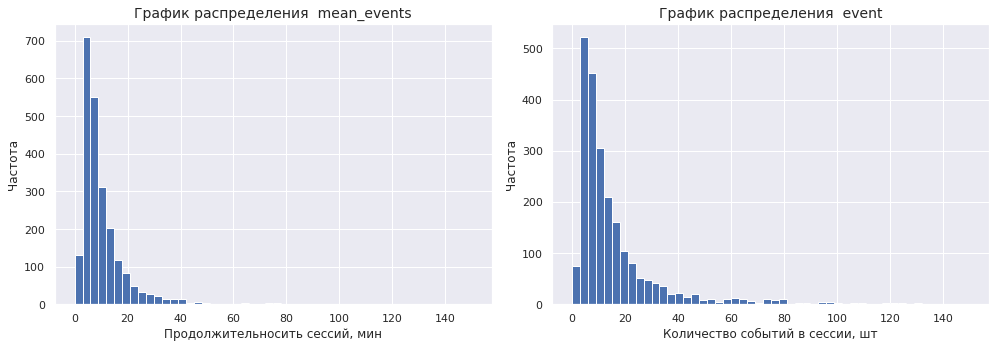

In [115]:
hist_plot(cnt_events_1, 'mean_events', 'event', 'Продолжительносить сессий, мин', 'Количество событий в сессии, шт')

По графикам наглядно видно, что первая когорта имеет пик активности между 20 и примерно 5 минутами.

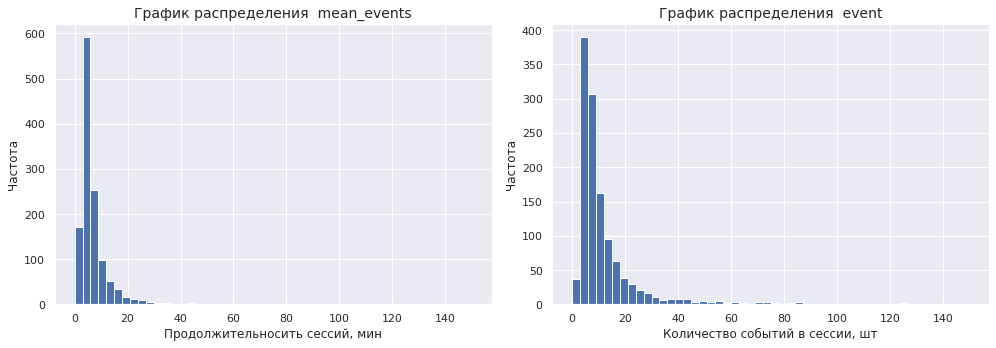

In [116]:
hist_plot(cnt_events_2, 'mean_events', 'event', 'Продолжительносить сессий, мин', 'Количество событий в сессии, шт')

У второй когорты картина немного меняется. Распределение чуть сместилось и средний показатель `mean_events` изменился. Но в целом картина схожа.

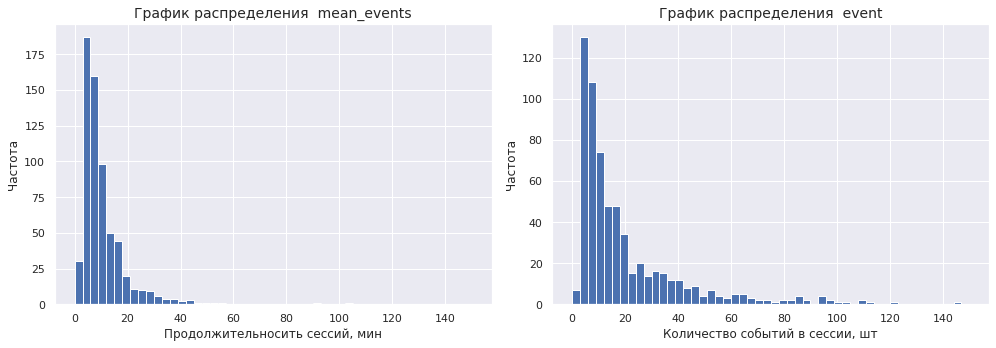

In [117]:
hist_plot(cnt_events_3, 'mean_events', 'event', 'Продолжительносить сессий, мин', 'Количество событий в сессии, шт')

Третья когорта похожа на первую. Количество событий здесь в целом больше, распределение плавное. Но наблюдается мягкая просадка по количеству событий в сессии.

**Вывод:** Распределения схожи, можно выделить третью группу. У третей группы картина распределения более хаотичная. Можно наблюдать просадки по событиям в сессии примерно на 20-40 минуте.

## Проверка статистических гипотез <a id="shag4"></a>  
[К содержанию](#soder)

### Различается ли конверсия в просмотры контактов из источников google и yandex<a id="shag4.1"></a>  
[К содержанию](#soder)

* Некоторые пользователи установили приложение по ссылке из yandex, другие — из google. Проверьте гипотезу: две эти группы демонстрируют разную конверсию в просмотры контактов.

Выделим пользователей с этими видами источников.

In [118]:
google_ads = df.query('source =="google"')['user'].unique().tolist()
print('Количество пользователей из google =', len(google_ads))

yandex_ads = df.query('source =="yandex"')['user'].unique().tolist()
print('Количество пользователей из yandex =', len(yandex_ads))

Количество пользователей из google = 1129
Количество пользователей из yandex = 1934


Теперь посчитаем конверсию для обеих групп

In [119]:
google_conversion = df.query('user==@google_ads')[['user', 'event']]
display(google_conversion.sample(4))

google_len = len(google_ads)
google_conv = google_conversion[google_conversion['event']=="contacts_show"]['user'].nunique()

print('Кол-во пользователей google =', google_len)
print('Кол-во contact_show у пользователей из google =', google_conv)
google_conversion = google_conv / google_len
print(f'Конверсия в целевое событие = {round(google_conversion*100, 2)}%')

,user,event
660,b946256d-4b0e-4f14-b326-70309e8a5679,tips_show
50534,af1765f2-cea5-4aa1-a6a3-0c4ab8b54a1f,photos_show
44451,b00645f6-7575-41a0-bd8d-b401aba74a4b,tips_show
63356,d3eac8b9-7500-4fec-a95c-9a87c3c06830,tips_show


Кол-во пользователей google = 1129
Кол-во contact_show у пользователей из google = 275
Конверсия в целевое событие = 24.36%


In [120]:
yandex_conversion = df.query('user==@yandex_ads')[['user', 'event']]
display(yandex_conversion.sample(4))

yandex_len = len(yandex_ads)
yandex_conv = yandex_conversion[yandex_conversion['event']=="contacts_show"]['user'].nunique()

print('Кол-во всего кликов по рекламе yandex =', yandex_len)
print('Кол-во contact_show у пользователей из yandex =', yandex_conv)
yandex_conversion_count = yandex_conv / yandex_len
print(f'Конверсия в целевое событие = {round(yandex_conversion_count*100, 2)}%')

,user,event
16387,3d4ae26c-63a2-4cf6-887b-45141d437ad9,tips_show
59580,d0033655-7741-4bee-8fd7-cb7383d095fc,contacts_show
36053,0b742e03-3fba-4ba1-8320-2edabcd70c9a,tips_show
1214,6fd56a18-0548-4330-acd9-de19b8e7915e,tips_show


Кол-во всего кликов по рекламе yandex = 1934
Кол-во contact_show у пользователей из yandex = 478
Конверсия в целевое событие = 24.72%


Конверсия из `google` на процент выше чем у `yandex`. При этом `yandex` имеет больший охват пользователей, в среднем приводя больше пользователей. (Разница примерно в 600 пользователей.) Теперь оформляем гипотезу. Для этого нам подойдет гипотеза о равенстве долей.

Теперь проведем тест. Для начала сформируем нулевую гипотезу. \
**Нулевая гипотеза - между долями значимая разница отсутствует. Алтернативная - разница есть;** \
Критический уровень статистической значимости возьмем стандартный равный 5%, так как высокая точность нам не нужна.

**Напишем функцию `stat_test(successes, trials, alpha)`, которая проводит тестирование на равенство долей, где**  
   * successes - успешная конверсия [группа1, группа2]  
   * trials - всего просмотров рекламы [группа1, группа2]   
   * alpha - критический уровень статистической значимости

In [121]:
def stat_test(successes, trials, alpha):  

    # alpha = .05 # критический уровень статистической значимости

    # successes = np.array([838, 1989])
    # trials = np.array([12262, 44065])

    alpha = alpha
    successes = successes
    trials = trials
    
    print(successes, trials)

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2


    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1) 


    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
    )

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )

    
alpha = .05
successes = [yandex_conv, google_conv]
trials = [yandex_len, google_len]

stat_test(successes, trials, alpha)    

[478, 275] [1934, 1129]
p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


**Вывод: Конверсия между `yandex` и `google` схожа т.к. мы подтвердили статистическую гипотезу.**

### Своя гипотеза  <a id="shag4.2"></a>  
[К содержанию](#soder)


Нас интересуют два источника конвертации пользователей `advert_open` и `tips_click`. Имеют ли они схожий характер конверсии или нет. Для этого сформируем гипотезу.

* Пользователи совершают действия "advert_open" и "tips_click". 
Гипотеза: Конверсия в просмотры контактов различается у этих двух событий.

Нулевая гипотеза - между долями значимая разница отсутствует. Алтернативная - разница есть;
Критический уровень статистической значимости возьмем стандартный равный 5%, так как высокая точность нам не нужна.

In [122]:
advert_open_user = df.query('event =="advert_open"')['user'].unique().tolist()

In [123]:
tips_click_user = df.query('event =="tips_click"')['user'].unique().tolist()

In [124]:
advert_open_user_conversion = df.query('user==@advert_open_user')[['user', 'event']]

advert_open_user_len = len(advert_open_user)
advert_open_user_conv = advert_open_user_conversion[advert_open_user_conversion['event']=="contacts_show"]['user'].nunique()

print('Кол-во кликов по рекламе  =', advert_open_user_conv)
print('Кол-во показов рекламы у пользователей =', advert_open_user_len)
advert_open_user_conversion_final = advert_open_user_conv / advert_open_user_len
print(f'Конверсия в целевое событие = {round(advert_open_user_conversion_final*100, 2)}%')

Кол-во кликов по рекламе  = 138
Кол-во показов рекламы у пользователей = 751
Конверсия в целевое событие = 18.38%


In [125]:
tips_click_user_conversion = df.query('user==@tips_click_user')[['user', 'event']]

tips_click_user_len = len(tips_click_user)
tips_click_user_conv = tips_click_user_conversion[tips_click_user_conversion['event']=="contacts_show"]['user'].nunique()

print('Кол-во кликов по рекламе  =', tips_click_user_conv)
print('Кол-во показов рекламы у пользователей =', tips_click_user_len)
tips_click_user_conversion_final = tips_click_user_conv / tips_click_user_len
print(f'Конверсия в целевое событие = {round(tips_click_user_conversion_final*100, 2)}%')

Кол-во кликов по рекламе  = 100
Кол-во показов рекламы у пользователей = 322
Конверсия в целевое событие = 31.06%


Нулевая гипотеза - между долями значимая разница отсутствует. Алтернативная - разница есть;
Критический уровень статистической значимости возьмем стандартный равный 5%, как и в тесте выше.

In [126]:
alpha = .05

successes = [tips_click_user_conv, advert_open_user_conv]
trials = [tips_click_user_len, advert_open_user_len]

stat_test(successes, trials, alpha) 

[100, 138] [322, 751]
p-значение:  4.606902525461365e-06
Отвергаем нулевую гипотезу: между долями есть значимая разница


**Вывод: Получается что придумать подходящую гипотезу у меня не получилось. Между долями присутствует разница, причем судя по всему довольно большая.**

## Выводы и рекомендации. <a id="shag5"></a>  
[К содержанию](#soder)

Ссылка на презентацию: [Ссылка](https://docs.google.com/presentation/d/1MSb-a1dztOuVMqVVjnBR9sPQF8n_-ZEg_xwExCq-V9I/edit?usp=sharing)

---
- В нашем распоряжении датасет с данными пользователями, которые совершили действия после 7 октября 2019 года. Горизонт исследования 27 дней.
    Была проведена предобработка и анализ событий. Мы нашли даты и время начала активности пользователей, а также ключевых событий.


- Для анализа действий пользователей были образованы сессии, в столбце `session_id`. Там мы посчитали время активности пользователей и более точные границы анализа для каждого из них. Сформировали дельту анализа на каждую сессию пользователя, попутно выяснив воронку действий каждого пользователя.


- Была посчитана конверсия в разрезе сессии в целевое действие. Она составила порядка 22.85%. Составлен датафрейм с перечнем действием пользователей. Тех кто совершил целевое действие и кто нет. Также были посчитаны пользователи которые совершили ЦС, но при это не позвонили. Это порядка 78%! Что довольно много, вероятно на этом этапе имеются проблемы.


- На этапе сегментации пользователей была проделана большая работа. Через функцию `get_dummies` мы получили профили и начали подготавливать их для K-Means. Таким образом мы поделили пользователей на 3 кластера. 2 соразмерных и один поменьше. После этого уже начали отвечать на вопросы.


- При расчете RR использовалась функция.Смотрели удержание по неделям. Было построено 3 "кривые". Удержание начинало падать на 3ей неделе. Возможно это специфика приложения.


- После была подсчитана конверсия по группам. Вторая группа показала наилучший результат. Порядка `8,5%`. В то время как 1 и 3 колеблятся в районе `5%`.


- Было подсчитано время между распространенными событиями групп и построены графики для разных кластеров. Из графиков следовало что среднее время сессий по первому кластеру находится в диапазоне 20 минут. Второй кластер имеет показатель до 15 минут. А третий кластер как и первый - 20 минут.Третий кластер выделился событиями за сессию, их у него больше всех.
    В целом можно сделать вывод, что пользователи пользуются приложением примерно 20 минут.


- Также мы провели стат тесты двух гипотез. Одна из них про конверсию `google` и `yandex`. Конверсия в целевое событие у yandex - `24.72%`, а у google - `24.36%%`. Мы подтвердили статистическую гипотезу. Нет основания считать доли разными.


- По аналогии с прошлым тестом я захотел посчитать конверсию между ключевыми событиями `advert_open` и `tips_click`. Конверсия в целевое событие у них была `18.38%` и `31.06%`. В выборке участвовали `751` и `322` пользователей. По итогам теста он показал что разница между долями есть.

---